## Линейная регрессия

In [1]:
# импорт библиотек
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

Загрузим данные о заработной плате сотрудников одной специальности.

In [2]:
df = pd.read_csv('5.2 Salary_Data.csv')

Посмотрим сами данные.

In [3]:
df.head()

,YearsExperience,Floor,Type,Salary
0,1.1,18,1,39343.0
1,1.3,17,1,46205.0
2,1.5,10,0,37731.0
3,2.0,13,0,73525.0
4,2.2,1,0,39891.0


В данных:
- Salary — заработная плата.
- YearsExperience — опыт работы.
- Floor — этаж, на котором работает сотрудник.
- Type — тип работы: офлайн или онлайн.

Скорее всего, зарплата зависит от опыта работы сотрудников. Проверим это с помощью графиков.

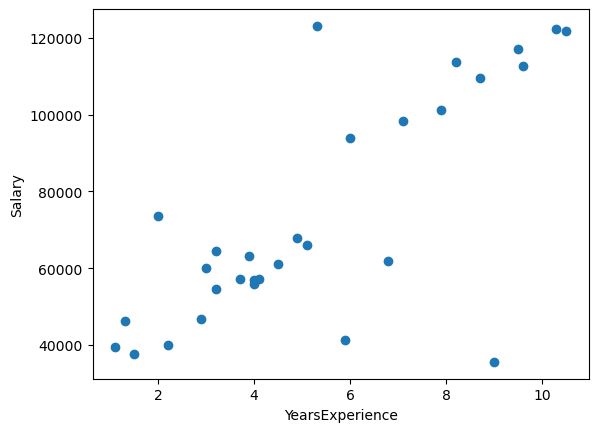

In [4]:
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.scatter(x=df['YearsExperience'],y=df['Salary'])

Наблюдается линейная зависимость, однако в данных присутствуют выбросы.

Очевидно, что зарплата не должна зависеть от этажа, на котором работает сотрудник. Проверим это с помощью графиков.

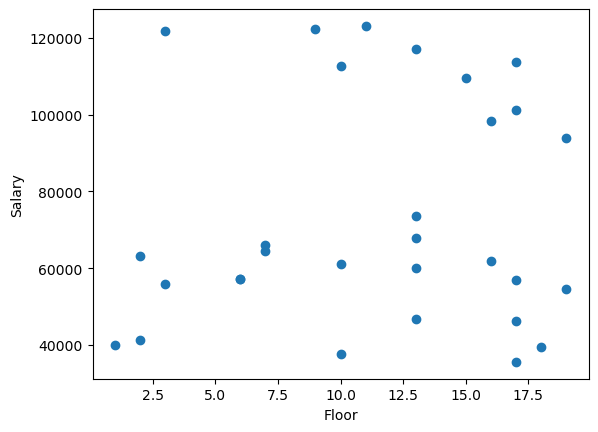

In [5]:
plt.xlabel("Floor")
plt.ylabel("Salary")
plt.scatter(x=df['Floor'],y=df['Salary'])

Зависимости не наблюдается.

И, скорее всего, зарплата не зависит от типа работы.

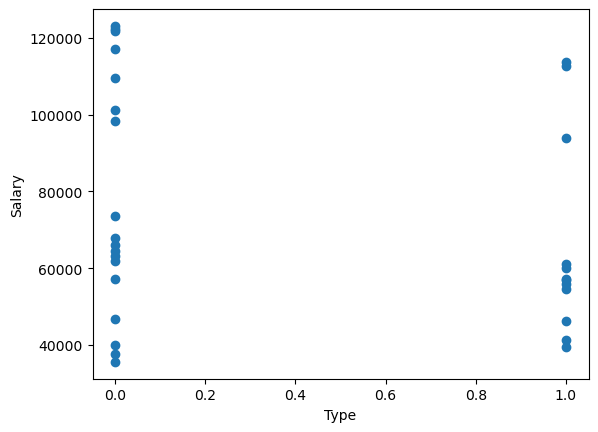

In [6]:
plt.xlabel("Type")
plt.ylabel("Salary")
plt.scatter(x=df['Type'],y=df['Salary'])

Зависимости также не наблюдается.

Действительно, зарплата явно зависит от опыта работы сотрудника и не зависит от этажа, на котором он работает, и типа работы.

Попробуем построить модель линейной регрессии зависимости Salary от остальных параметров. И дополнительно добавим ещё признаков на незначимых переменных.

In [7]:
df['x'] = df['Floor'] ** 2

In [8]:
train_df, test_df  = train_test_split(df, test_size=0.3, random_state=3)

In [9]:
train_df = train_df.sort_values(by='YearsExperience', ascending=False)
train_X = train_df[['YearsExperience', 'Floor', 'Type', 'x']]
train_y = train_df[['Salary']]

test_df = test_df.sort_values(by='YearsExperience', ascending=False)
test_X = test_df[['YearsExperience', 'Floor', 'Type', 'x']]
test_y = test_df[['Salary']]

Построим простую модель регресии на всех данных и оценим её качество.

In [10]:
linear_regression = LinearRegression() 
linear_regression.fit(train_X, train_y)

LinearRegression()

In [11]:
# вывод точности предсказания
print(linear_regression.score(train_X, train_y))
print(linear_regression.score(test_X, test_y))

0.5880177111217567
0.26143206957081644


In [12]:
# коэффициенты модели
print('w_0:', linear_regression.intercept_)
coef = list(linear_regression.coef_[0])
for i in range(len(coef)):
  print(f'w_{i+1}:', coef[i], train_X.columns[i])

w_0: [20548.76734613]
w_1: 6698.54772188124 YearsExperience
w_2: 6284.33154030458 Floor
w_3: 6926.782218631152 Type
w_4: -328.81623409739785 x


Несмотря на то, что этаж никак не влияет на целевую функцию, эта переменная присутствует в модели с коэффициентом 6698, а квадрат этой переменной — с отрицательным знаком. Что явно вносит путаницу в понимание модели.
Более того, качество модели на тестовой выборке сильно ниже, чем на обучающей.

Посмотрим на предсказания модели.

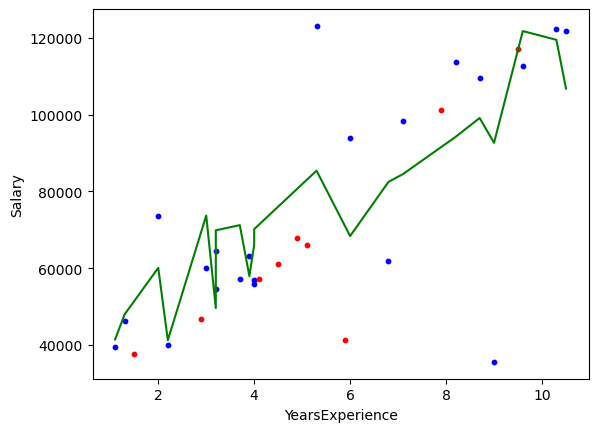

In [13]:
y_predict_train = linear_regression.predict(train_X)

plt.scatter(train_X['YearsExperience'], train_y, s=10, c='b')
plt.scatter(test_X['YearsExperience'], test_y, s=10, c='r')
plt.plot(train_X['YearsExperience'], y_predict_train, c='g')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

Воспользуемся регуляризацией.

## Ridge

Для обучения модели с L2-регуляризацией импортрируем `from sklearn.linear_model import Ridge`.

In [14]:
from sklearn.linear_model import Ridge

ridge_regression = Ridge(alpha=0.1)  # alpha — величина регуляризации

# обучение
ridge_regression.fit(train_X, train_y)

Ridge(alpha=0.1)

In [15]:
# вывод точности предсказания
print(ridge_regression.score(train_X, train_y))
print(ridge_regression.score(test_X, test_y))

0.5880094396660367
0.26557903244823244


In [16]:
# коэффициенты модели
print('w_0:', ridge_regression.intercept_)
print('w_i:', ridge_regression.coef_)

w_0: [20713.09231767]
w_i: [[6689.99028928 6258.35506226 6729.75540192 -327.2544208 ]]


Попробуем подобрать параметр регуляризации.

In [21]:
coef = []
for i in range(-7, 2):
  alpha = 10**i
  ridge_regression = Ridge(alpha=alpha)  # alpha — величина регуляризации

  # обучение
  ridge_regression.fit(train_X, train_y)

  coef.extend(list(ridge_regression.coef_))

  # вывод точности предсказания
  print('-'*5, 'lambda =', alpha, '-'*5)
  print(ridge_regression.score(train_X, train_y))
  print(ridge_regression.score(test_X, test_y))

----- lambda = 1e-07 -----
0.5880177111217566
0.26143207384238254
----- lambda = 1e-06 -----
0.5880177111217559
0.2614321122864737
----- lambda = 1e-05 -----
0.5880177111216696
0.2614324967262529
----- lambda = 0.0001 -----
0.5880177111130567
0.2614363410095315
----- lambda = 0.001 -----
0.5880177102521478
0.26147477239989536
----- lambda = 0.01 -----
0.5880176245610711
0.2618579455880059
----- lambda = 0.1 -----
0.5880094396660367
0.26557903244823244
----- lambda = 1 -----
0.5874614474094809
0.2943396147409887
----- lambda = 10 -----
0.5783287304263152
0.37034013887442585


In [22]:
coef = pd.DataFrame(coef, columns=train_X.columns)
coef

,YearsExperience,Floor,Type,x
0,6698.547713,6284.331514,6926.782016,-328.816233
1,6698.547634,6284.331278,6926.780194,-328.816218
2,6698.546848,6284.328912,6926.761975,-328.816076
3,6698.538981,6284.305262,6926.579783,-328.814648
4,6698.460326,6284.068780,6924.758364,-328.800379
5,6697.675460,6281.706718,6906.593581,-328.657905
6,6689.990289,6258.355062,6729.755402,-327.254421
7,6625.902420,6046.837786,5339.034956,-314.929413
8,6310.749195,4747.743122,1554.180900,-248.029836


<AxesSubplot:>

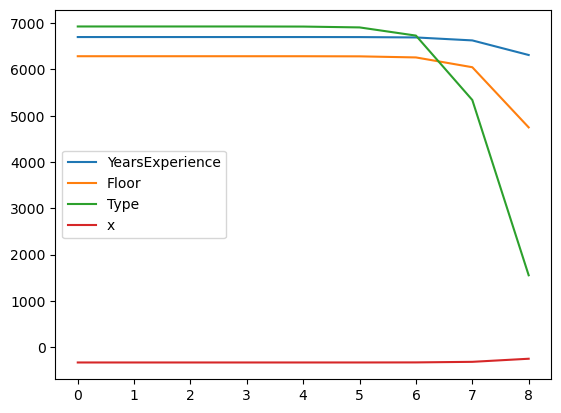

In [23]:
coef.plot()

Посмотрим, как изменились предсказания модели.

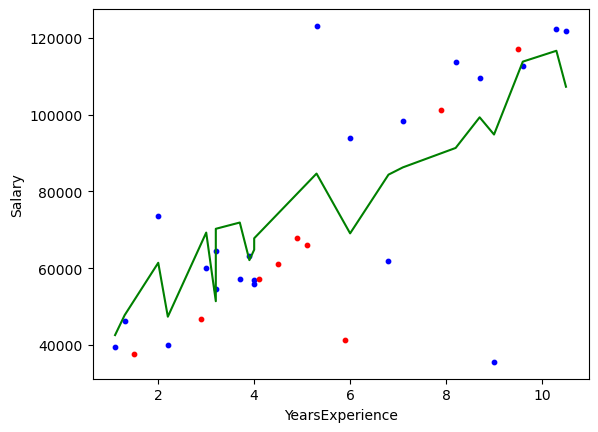

In [24]:
y_predict_train = ridge_regression.predict(train_X)

plt.scatter(train_X['YearsExperience'], train_y, s=10, c='b')
plt.scatter(test_X['YearsExperience'], test_y, s=10, c='r')
plt.plot(train_X['YearsExperience'], y_predict_train, c='g')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

Видим, что почти ничего не изменилось.
Попробуем предварительно нормализовать данные и только потом строить модель.

Нормализация — это процесс масштабирования отдельных образцов в единичную норму.

Произведём номализацию с помощью метода `normalize()` в `sklearn`.

Посмотрите пример:

In [25]:
from sklearn import preprocessing

example = pd.DataFrame({'x1': [0, 1, 200], 
                        'x2': [1000, 1500, 2000]})
example

,x1,x2
0,0,1000
1,1,1500
2,200,2000


In [26]:
preprocessing.normalize(example, axis=0)

array([[0.        , 0.37139068],
       [0.00499994, 0.55708601],
       [0.9999875 , 0.74278135]])

Произведём нормализацию наших данных.

In [27]:
from sklearn import preprocessing

d = preprocessing.normalize(df, axis=0)
scaled_df = pd.DataFrame(d, columns=df.columns)
scaled_df.head()

,YearsExperience,Floor,Type,Salary,x
0,0.033464,0.260569,0.288675,0.091122,0.299985
1,0.039549,0.246093,0.288675,0.107015,0.267579
2,0.045633,0.144760,0.000000,0.087388,0.092588
3,0.060844,0.188189,0.000000,0.170290,0.156474
4,0.066928,0.014476,0.000000,0.092391,0.000926


In [28]:
train_df, test_df  = train_test_split(scaled_df, test_size=0.3, random_state=3)

In [29]:
train_df = train_df.sort_values(by='YearsExperience', ascending=False)
train_X = train_df[['YearsExperience', 'Floor', 'Type', 'x']]
train_y = train_df[['Salary']]

test_df = test_df.sort_values(by='YearsExperience', ascending=False)
test_X = test_df[['YearsExperience', 'Floor', 'Type', 'x']]
test_y = test_df[['Salary']]

In [34]:
coef = []
for i in range(-7, -1):
  alpha = 10**i
  ridge_regression = Ridge(alpha=alpha)  # alpha — величина регуляризации

  # обучение
  ridge_regression.fit(train_X, train_y)

  coef.extend(list(ridge_regression.coef_))

  # вывод точности предсказания
  print('-'*5, 'lambda =', alpha, '-'*5)
  print(ridge_regression.score(train_X, train_y))
  print(ridge_regression.score(test_X, test_y))

----- lambda = 1e-07 -----
0.5880177110819765
0.26143974719718366
----- lambda = 1e-06 -----
0.5880177071454735
0.2615088222981585
----- lambda = 1e-05 -----
0.5880173152121784
0.26219725045418785
----- lambda = 0.0001 -----
0.5879797790140981
0.2688562747594251
----- lambda = 0.001 -----
0.5854326622531711
0.3183303079496185
----- lambda = 0.01 -----
0.5524439588412442
0.41920291494768946


In [35]:
coef = pd.DataFrame(coef, columns=train_X.columns)
coef

,YearsExperience,Floor,Type,x
0,0.509974,1.005432,0.055574,-0.822513
1,0.509980,1.005210,0.055568,-0.822346
2,0.510045,1.002988,0.055509,-0.820672
3,0.510671,0.981293,0.054933,-0.804322
4,0.515128,0.806242,0.050141,-0.672311
5,0.508236,0.283210,0.031046,-0.274886


<AxesSubplot:>

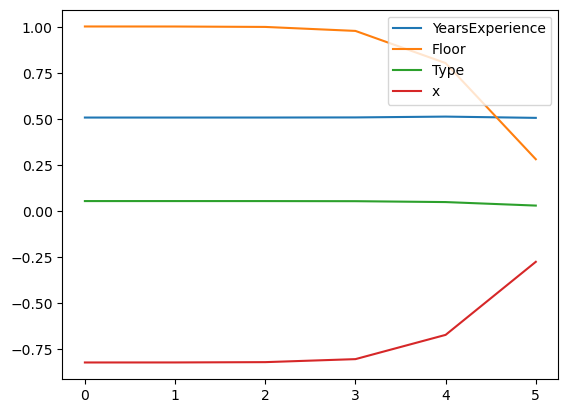

In [36]:
coef.plot()

Посмотрим, как изменились предсказания модели.

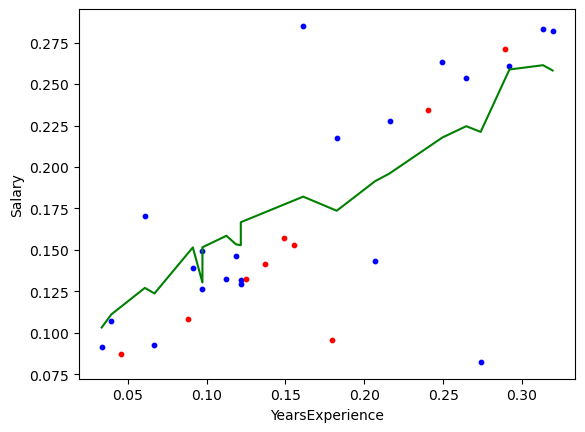

In [38]:
y_predict_train = ridge_regression.predict(train_X)

plt.scatter(train_X['YearsExperience'], train_y, s=10, c='b')
plt.scatter(test_X['YearsExperience'], test_y, s=10, c='r')
plt.plot(train_X['YearsExperience'], y_predict_train, c='g')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

Видим, что при нормализации данных и правильном подборе параметра `lambda` с помощью регуляризации можно повысить её качество.

### Самостоятельный разбор 

В контексте программирования и анализа данных, "размерность одного порядка" означает, что входные переменные имеют одинаковый порядок масштаба или единицы измерения. Это означает, что значения переменных находятся в примерно одном диапазоне или имеют схожую природу.

Например, если у нас есть две переменные: "время в секундах" и "температура в градусах Цельсия", и обе переменные имеют значения порядка 10^2 (от 10 до 100), то можно сказать, что они имеют размерность одного порядка. Это упрощает анализ и обработку данных, так как переменные имеют схожий масштаб и их можно сравнивать и комбинировать без необходимости в дополнительных преобразованиях.

Однако, если переменные имеют разные порядки масштаба, например, одна переменная имеет значения порядка 10^2, а другая - порядка 10^6, то они имеют разную размерность порядка. В таком случае, может потребоваться нормализация или преобразование данных, чтобы привести их к схожему масштабу и обеспечить корректный анализ.

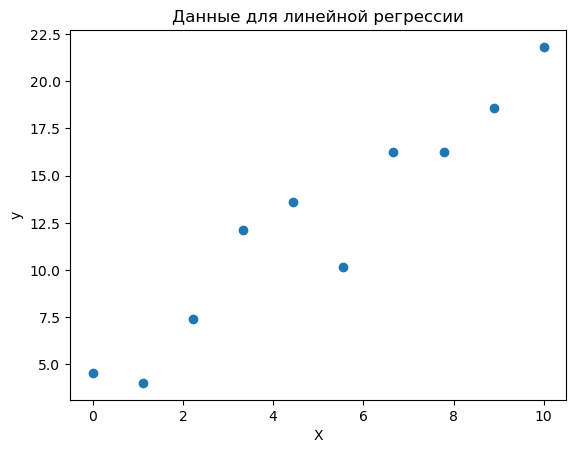

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Задаем случайное зерно для воспроизводимости результатов
np.random.seed(0)

# Генерируем случайные данные
X = np.linspace(0, 10, 10)  # Входные значения
noise = np.random.normal(0, 2, 10)  # Шум
y = 2 * X + 1 + noise  # Выходные значения

# Выводим график данных
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Данные для линейной регрессии')
plt.show()


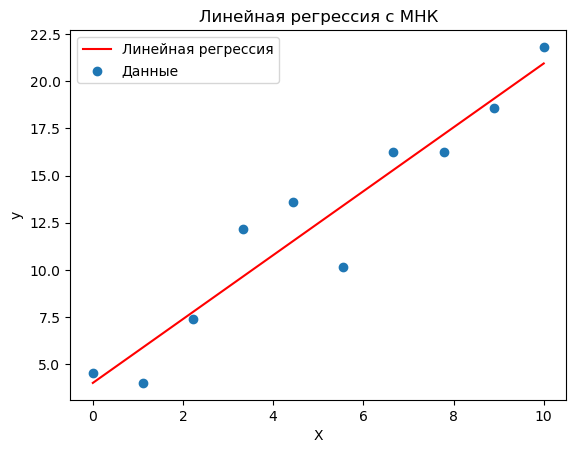

In [40]:
from sklearn.linear_model import LinearRegression

# Создаем объект модели линейной регрессии
model = LinearRegression()

# Обучаем модель на данных
model.fit(X.reshape(-1, 1), y)

# Получаем предсказания модели
y_pred = model.predict(X.reshape(-1, 1))

# Выводим график до и после применения МНК
plt.scatter(X, y, label='Данные')
plt.plot(X, y_pred, color='red', label='Линейная регрессия')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Линейная регрессия с МНК')
plt.legend()
plt.show()


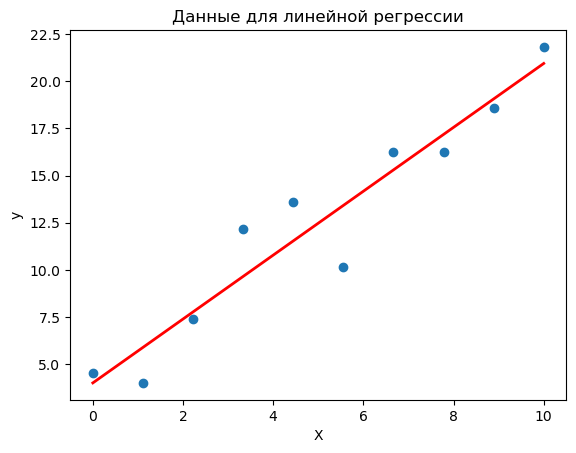

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Задаем случайное зерно для воспроизводимости результатов
np.random.seed(0)

# Генерируем случайные данные
X = np.linspace(0, 10, 10)  # Входные значения
noise = np.random.normal(0, 2, 10)  # Шум
y = 2 * X + 1 + noise  # Выходные значения

# Создаем и обучаем модель линейной регрессии
model = LinearRegression()
model.fit(X.reshape(-1, 1), y)

# Получаем предсказания модели для входных значений
y_pred = model.predict(X.reshape(-1, 1))

# Выводим график данных и линейной регрессии
plt.scatter(X, y)
plt.plot(X, y_pred, color='red', linewidth=2)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Данные для линейной регрессии')
plt.show()


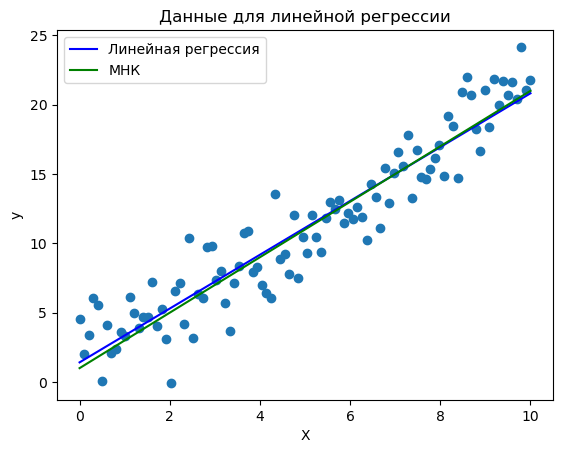

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Задаем случайное зерно для воспроизводимости результатов
np.random.seed(0)

# Генерируем случайные данные
X = np.linspace(0, 10, 100)  # Входные значения
noise = np.random.normal(0, 2, 100)  # Шум
y = 2 * X + 1 + noise  # Выходные значения

# Выполняем линейную регрессию с использованием МНК
coefficients = np.polyfit(X, y, 1)
p = np.poly1d(coefficients)

# Выводим график данных и линейной регрессии
plt.scatter(X, y)
plt.plot(X, p(X), color='blue', label='Линейная регрессия')
plt.plot(X, 2 * X + 1, color='green', label='МНК')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Данные для линейной регрессии')
plt.legend()
plt.show()


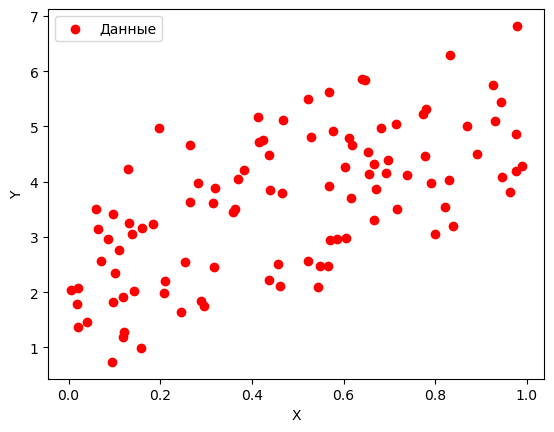

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация случайных данных
np.random.seed(0)
X = np.random.rand(100, 1)
Y = 2 + 3 * X + np.random.randn(100, 1)

# Вывод графика
plt.scatter(X, Y, color='red', label='Данные')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


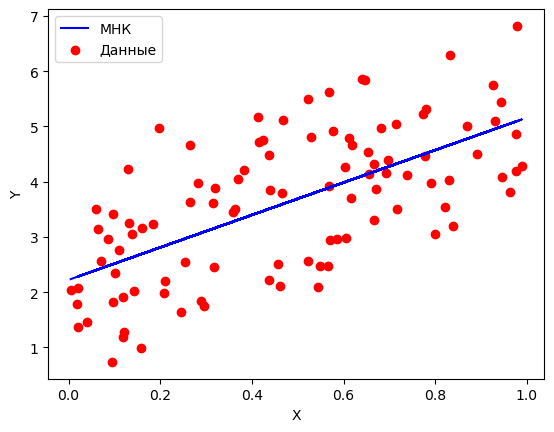

In [45]:
from sklearn.linear_model import LinearRegression

# Применение метода наименьших квадратов (МНК)
regression = LinearRegression()
regression.fit(X, Y)

# Вывод графика с результатами МНК
plt.scatter(X, Y, color='red', label='Данные')
plt.plot(X, regression.predict(X), color='blue', label='МНК')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


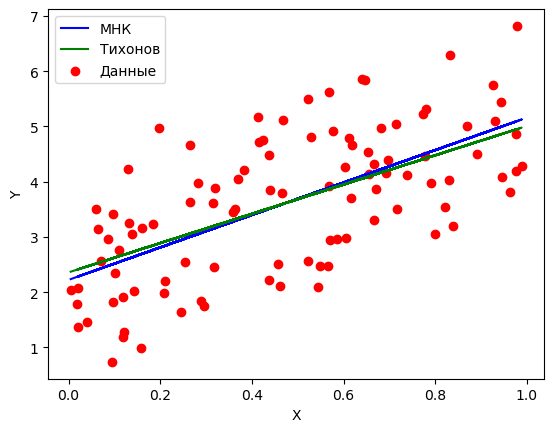

In [46]:
from sklearn.linear_model import Ridge

# Применение регуляризации Тихонова
ridge = Ridge(alpha=0.9)  # Здесь alpha - параметр регуляризации
ridge.fit(X, Y)

# Вывод графика с результатами регуляризации Тихонова
plt.scatter(X, Y, color='red', label='Данные')
plt.plot(X, regression.predict(X), color='blue', label='МНК')
plt.plot(X, ridge.predict(X), color='green', label='Тихонов')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
